<a href="https://colab.research.google.com/github/khuyentran1401/Twitter/blob/master/Twitter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
import numpy as np
import nltk

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/NLP/Data (1)/Data.zip' 'Data.zip'

In [0]:
!unzip -qq Data.zip

In [0]:
path_train = '/content/Data/train/en'
path_test = '/content/Data/test/en'

In [0]:
files_train = [f for f in listdir(path_train) if isfile(join(path_train, f))]
files_test = [f for f in listdir(path_test) if isfile(join(path_test, f))]

In [10]:
for r in ET.parse(join(path_train,files_train[-1])).getroot()[0]:
    print(r.text)

@SeanyJB69 weekend of judgement.. when she had all the tweets read out about her &amp; Luisa told her how horrible she was being to Jedward etc
Notice how nice Nicola is being since she got told about herself #CBB
Peter Andre has got a bit of an unfair advantage on #LipSyncBattleUK hasn't he.. I mean it is what he does for a living isn't it?!
Oh stop it Jamie &amp; Bianca you cringe bags 😫 #CBB
Nicola don't give a fucking fuck what Jedward think yet now she's sitting there with a face full of makeup #CBB
Christ!! Nicola is turning into Kim number 2!! #CBB
@Melvinodoom @RickieHW @charliehedges @KissFMUK I feel this needs to be addressed tomorrow morning 😂🤣 https://t.co/g0M5VpR5jv
Just casually protesting about Trump with a box of M&amp;Ms on her head 🤣  #channel4news https://t.co/6l86KTIpYd
I didn't come in here looking for a thing.. yeah ok Jamie.. is that why you tried cracking on with Jasmine, Nicola &amp; now Bianca?! #CBB
Gone from hating Speidi to liking them back full circle to n

In [0]:
#ET.parse converts the file into the tree
def convert_texts(path_train, files_train):
    
    doc = []
    for i in range(len(files_train)):
        #Append the tweets to the corresponding document
        try:
            doc1 =[r.text for r in ET.parse(join(path_train,files_train[i])).getroot()[0]]
            doc.append(' '.join(t for t in doc1))
        except:
            print(files_train[i])
    return doc

In [12]:
# list of train and text tweets
t_train = convert_texts(path_train, files_train)
t_test  = convert_texts(path_test, files_test)

truth.txt
truth.txt


# Get Labels 

In [0]:
#Need explanation
def get_labels(path, files):
    dic={}
    task=[[],[]]
    for e in open(join(path,'truth.txt')).read().split('\n'):
        d=e.split(':::')
        if(len(d)==3):
            dic.update({d[0]: d[1:]})
            task[0].append(d[1])
            task[1].append(d[2])
    task=[sorted(list(set(t))) for t in task]
    
    d_task = [{item:i for i, item in enumerate(t)} for t in task]
    labels=[[],[]]

    for e in files:
        try:
            ID=e[:-4]
            labels[0].append(d_task[0][dic[ID][0]])
            labels[1].append(d_task[1][dic[ID][1]])
        except:
            pass#print(e)
    print(d_task)
    return np.array(labels)


In [14]:
labels_train = get_labels(path_train, files_train)
labels_test  = get_labels(path_test , files_test)
labels_train.shape

[{'female': 0, 'male': 1}, {'australia': 0, 'canada': 1, 'great britain': 2, 'ireland': 3, 'new zealand': 4, 'united states': 5}]
[{'female': 0, 'male': 1}, {'australia': 0, 'canada': 1, 'great britain': 2, 'ireland': 3, 'new zealand': 4, 'united states': 5}]


(2, 3600)

In [15]:
labels_train[0]

array([1, 1, 0, ..., 0, 0, 0])

# Check distribution of data

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
print(Counter(labels_train[0]))

print(Counter(labels_train[1]))

Counter({1: 1800, 0: 1800})
Counter({0: 600, 5: 600, 4: 600, 1: 600, 3: 600, 2: 600})


# Preprocessing

In [0]:
import re

replacement_patterns = [
    #match url (i.e: https://t.co/5tF5G9VKtq)
    (r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '<url>'),

    #match user (i.e: @cerpintor )
    (r'@\w+', '<user>'),

    #match hashtag (i.e: #WomensMarchOnWashington)
    (r'#\w+', '<hashtag>'),

    #Replace "&..." with ''
    (r'&\w+', '')
]

class RegexReplacer(object):
    def __init__(self, patterns = replacement_patterns):
        self.patterns = [(re.compile(regrex),repl) for (regrex, repl) in
                        patterns]
    
    #Replace the words that match the patterns with replacement words
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

In [17]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

tknz = TweetTokenizer()
replacer = RegexReplacer()
stopwords = set(stopwords.words('english'))
punc = string.punctuation

def normalize(doc):
    
    for i in range(len(doc)):
        
        #Tokenize with replacement
        doc[i] = tknz.tokenize(replacer.replace(doc[i]))
        
        #Filter stopwords, punctuations, and lowercase
        doc[i] = [w.lower() for w in doc[i] if w not in punc and w not in stopwords]
    
        #Stem words
        
        lemmatizer = WordNetLemmatizer()
        
        doc[i] = [lemmatizer.lemmatize(w, pos='v') for w in doc[i]]
        
        
        #concat
        doc[i] = ' '.join(w for w in doc[i])
        
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
nltk.download('wordnet')

t_train = normalize(t_train)
t_test =normalize(t_test)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
print(len(t_train))
print(len(t_test))

3600
2400


# Frequency of Words

In [22]:
corpus_tweet = []

for doc in t_train:
    corpus_tweet += doc.split()

fdist = nltk.FreqDist(corpus_tweet)

fdist

FreqDist({'<user>': 273542,
          'appear': 412,
          'chinese': 360,
          'log': 144,
          'little': 2849,
          'early': 1209,
          'census': 37,
          'data': 865,
          'hey': 1685,
          'port': 128,
          "macquarie's": 6,
          'lachlan': 4,
          'morton': 7,
          'win': 3705,
          'tour': 573,
          'utah': 18,
          '<url>': 168856,
          'disappoint': 410,
          'decades': 111,
          'olympic': 106,
          'sport': 772,
          'go': 16544,
          'professional': 287,
          'amateurs': 18,
          'still': 5540,
          'charge': 673,
          '<hashtag>': 143619,
          'the': 19973,
          'contradiction': 20,
          'split': 178,
          'liberal': 300,
          'party': 1610,
          'via': 9967,
          'devoid': 18,
          'answer': 945,
          'sure': 3221,
          'even': 5011,
          'know': 10082,
          'question': 1598,
          '...':

In [23]:
len(fdist)

104400

In [0]:
def sortFreqDist(freqdict):
    
    freq = [(freqdict[key], key) for key in freqdict]
    return sorted(freq, reverse = True)

In [0]:
freq_tweets = sortFreqDist(fdist)
freq_tweets = freq_tweets[:5000]

# Bag of Words

In [26]:
#index of frequent tweets
dict_indices = dict()
index = 0
for i, word in enumerate(freq_tweets):
    dict_indices[word[1]] = i
    
dict_indices
t_train

["<user> appear chinese log little early census data hey <user> port macquarie's lachlan morton win tour utah <url> disappoint decades olympic sport go professional amateurs still charge <hashtag> <url> the contradiction split liberal party <url> via <user> <user> devoid answer sure even know question ... <url> <hashtag> worry blue-collar job he mob mob describe current govt pretty well <url> <url> the rise <hashtag> failure know better <hashtag> <hashtag> good article <hashtag> <url> proud 12,826 th backer <user> oi the bike bell doe ... thx <user> <url> introduce oi the revolutionary new bike bell knog check <hashtag> <url> <hashtag> <user> but 4 phone damage that would 360 pay per phone x 4 50 phone value hardly economical <user> some info key computer virtually examination phone <user> i understand warranty i'm sorry i saw evidence assessment time i visit store <user> know fall void warranty what tell pay phone twice warranty back <user> problems phone <user> practice quite maximum

In [27]:
freq, freq_words = zip(*freq_tweets)
freq_words

('<user>',
 '<url>',
 '<hashtag>',
 'i',
 '...',
 '…',
 'get',
 'the',
 'go',
 'like',
 "i'm",
 'one',
 'thank',
 'time',
 'think',
 'make',
 'new',
 'good',
 'see',
 'love',
 'say',
 '😂',
 'know',
 'via',
 'look',
 'day',
 'great',
 'people',
 'trump',
 'need',
 'today',
 'work',
 'be',
 'this',
 '’',
 'you',
 'come',
 'would',
 'take',
 'want',
 'a',
 'back',
 'us',
 'do',
 'well',
 'much',
 'right',
 'more',
 "can't",
 'really',
 'year',
 '️',
 "it's",
 'watch',
 'what',
 'still',
 'last',
 'first',
 'best',
 "that's",
 'use',
 'so',
 '2',
 'my',
 'it',
 'even',
 'feel',
 'and',
 'give',
 'way',
 'happy',
 'how',
 "i've",
 'start',
 'we',
 'try',
 'could',
 'u',
 '..',
 'just',
 'find',
 'show',
 'read',
 'if',
 'never',
 'hope',
 'please',
 'live',
 'play',
 'call',
 'check',
 'life',
 'wait',
 'next',
 'fuck',
 'also',
 'world',
 'better',
 'help',
 'yes',
 'night',
 'win',
 '❤',
 'tell',
 'keep',
 'oh',
 'many',
 '3',
 'no',
 'not',
 'game',
 'week',
 'follow',
 'leave',
 'news',

In [0]:
import numpy as np

def build_bow_tr(t_train, freq_words, dict_indices):
    
    BOW = np.zeros((len(t_train), len(freq_tweets)), dtype=int)
    
    for index, tr in enumerate(t_train):
        fdist_doc = nltk.FreqDist(tr.split())
        
        for word in fdist_doc:
            if word in freq_words:
                BOW[index, dict_indices[word]] = fdist_doc[word]
        
    return BOW

In [29]:
BOW_tr = build_bow_tr(t_train, freq_words, dict_indices)
freq_tweets

[(273542, '<user>'),
 (168856, '<url>'),
 (143619, '<hashtag>'),
 (68721, 'i'),
 (31254, '...'),
 (26397, '…'),
 (21853, 'get'),
 (19973, 'the'),
 (16544, 'go'),
 (15707, 'like'),
 (13847, "i'm"),
 (13268, 'one'),
 (13205, 'thank'),
 (11949, 'time'),
 (11785, 'think'),
 (11630, 'make'),
 (11476, 'new'),
 (11059, 'good'),
 (11020, 'see'),
 (10457, 'love'),
 (10215, 'say'),
 (10159, '😂'),
 (10082, 'know'),
 (9967, 'via'),
 (9652, 'look'),
 (9461, 'day'),
 (9453, 'great'),
 (9327, 'people'),
 (9151, 'trump'),
 (8963, 'need'),
 (8783, 'today'),
 (8736, 'work'),
 (8482, 'be'),
 (8464, 'this'),
 (8120, '’'),
 (7876, 'you'),
 (7458, 'come'),
 (7381, 'would'),
 (7366, 'take'),
 (7247, 'want'),
 (7219, 'a'),
 (7012, 'back'),
 (6804, 'us'),
 (6244, 'do'),
 (6207, 'well'),
 (6110, 'much'),
 (6101, 'right'),
 (6048, 'more'),
 (5938, "can't"),
 (5898, 'really'),
 (5855, 'year'),
 (5845, '️'),
 (5813, "it's"),
 (5782, 'watch'),
 (5602, 'what'),
 (5540, 'still'),
 (5441, 'last'),
 (5319, 'first'),
 (

In [30]:
BOW_tr.shape

(3600, 5000)

In [0]:
BOW_val = build_bow_tr(t_test, freq_words, dict_indices )

In [32]:
BOW_val.shape

(2400, 5000)

# Tf-Idf

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 

#tf-idf
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

#just send in all your docs here
tfidf_vectorizer_train=tfidf_vectorizer.fit_transform(t_train)

tfidf_vectorizer_test=tfidf_vectorizer.transform(t_test)


In [34]:
tfidf_vectorizer_train.shape

(3600, 87879)

In [35]:
tfidf_vectorizer_test.shape

(2400, 87879)

## With n-grams

In [0]:
n_grams_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,3))

n_grams_vectorizer_vectors = n_grams_vectorizer.fit_transform(t_train)

# Dimension Reduction (TSNE)

In [0]:
import math
from sklearn.model_selection import train_test_split

def compute_dor(TR, ndocs_out=0, y=None):    
    TR_subset_in = None
    if y is None:
        TR_subset_in, TR_subset_out = train_test_split(TR, test_size=ndocs_out, random_state=1)
    else :
        TR_subset_in, TR_subset_out = train_test_split(TR, stratify=y, test_size=ndocs_out, random_state=1)
    
    DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype=np.float)
    print("DOR: Shape of the input matrix (BoT):", TR.shape)
    print("DOR: Shape of the term-feat matrix:", DTR.shape)

    tam_V = TR_subset_in.shape[1]
    for doc, i in zip(TR_subset_in, range(len(TR_subset_in))):
        nonzero_positions = np.nonzero(doc)[0] # returns a tuple of n-dimensions. Since we have 1D array docs, it returns a tuple with one element. thus, we get the 0 index.
        tam_v = len(nonzero_positions) 
        for term in nonzero_positions:
            DTR[term, i] = (1 + math.log10(doc[term])) * math.log10(tam_V/tam_v)
    return DTR

In [38]:
from sklearn import preprocessing
DOR_base = compute_dor(BOW_tr, 0.01)
DOR_base = preprocessing.normalize(DOR_base, norm='l2')

DOR: Shape of the input matrix (BoT): (3600, 5000)
DOR: Shape of the term-feat matrix: (5000, 3564)


In [39]:
from sklearn.feature_selection import SelectKBest, chi2
feats = SelectKBest(chi2, k=1000)
feats.fit(BOW_tr, labels_train[0])

best=feats.get_support(indices=True)
print('Reduce from {} features to {} features'.format(BOW_tr.shape[1],best.shape[0]))

      
      
      

Reduce from 5000 features to 1000 features


In [0]:
#give the word provided the index
dict_indice_invert = {}
for w in dict_indices:
    dict_indice_invert[dict_indices[w]] = w

In [41]:
#Select the most important words
target_words = [dict_indice_invert[index] for index in best]

#Select important and most frequent words
words = [word for word in target_words if word in dict_indices]

#Select vector of these words
target_matrix = np.array([DOR_base[dict_indices[word]] for word in words])
target_matrix.shape

(1000, 3564)

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/NLP/tsne_python/tsne.py' 'tsne.py'

In [43]:
#Reduce the dimension


from tsne import tsne

reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 0.157815
Iteration 10: error is 17.732443
Iteration 20: error is 16.440154
Iteration 30: error is 15.960824
Iteration 40: error is 16.118407
Iteration 50: error is 16.113614
Iteration 60: error is 16.095150
Iteration 70: error is 16.087271
Iteration 80: error is 16.091642
Iteration 90: error is 16.095737
Iteration 100: error is 16.092425
Iteration 110: error is 1.970291
Iteration 120: error is 1.510644
Iteration 130: error is 1.336902
Iteration 140: error is 1.245762
Iteration 150: error is 1.188915
Iteration 160: error is 1.150026
Iteration 170: error is 1.122234
Iteration 180: error is 1.101979
Iteration 190: error is 1.086181
Iteration 200: error is 1.073510
Iteration 210: error is 1.063607
Iteration 220: error is 1.055638
Iteration 230: error is 1.049091
Iteration 240: error is 1.043654
Iteration 250: error is

In [0]:
#Set the limit of the axes
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

In [45]:
reduced_matrix.shape

(1000, 2)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127995 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127996 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128079 missing from current font.
  f

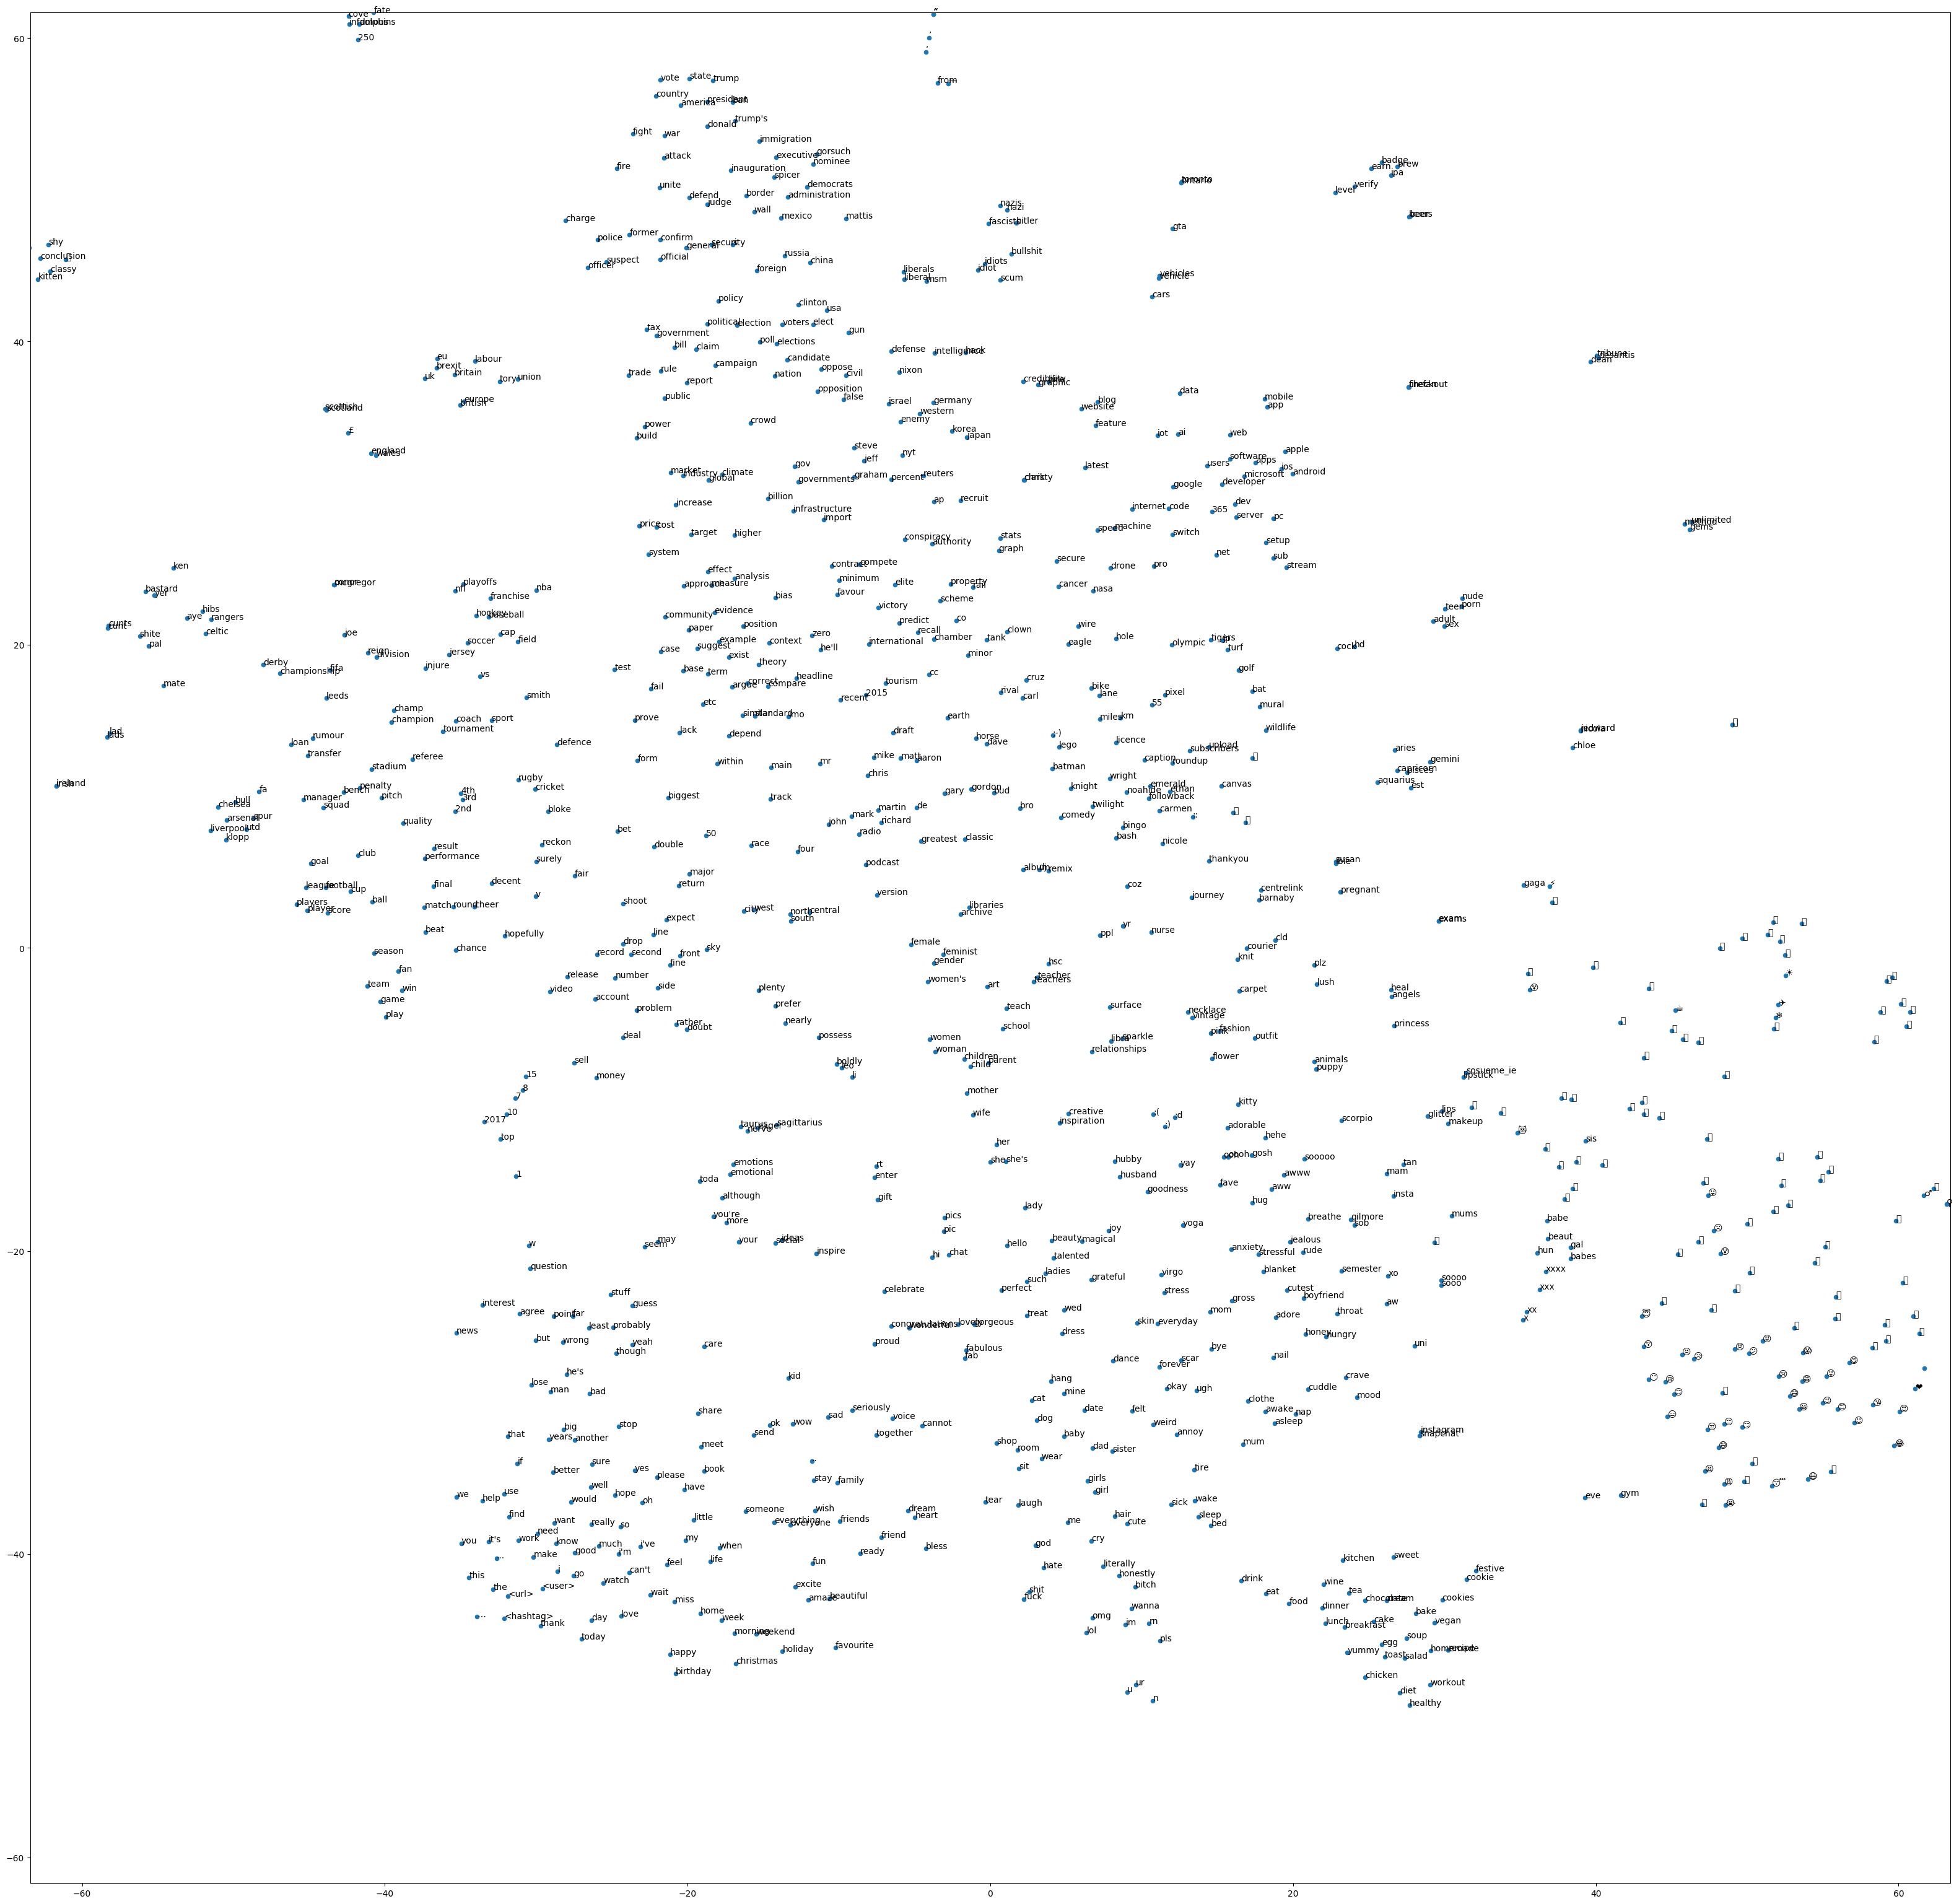

In [46]:
plt.figure(figsize=(40,40), dpi=100); plt.xlim((-max_x,max_x)); plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);
for i, word in enumerate(words):
    x = reduced_matrix[i, 0]
    y = reduced_matrix[i, 1]
    plt.annotate(word, (x,y))


# SVM

## Bag of Words

In [0]:
import csv
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_tr,labels_train[0])

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))


[[940 260]
 [310 890]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1200
           1       0.77      0.74      0.76      1200

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
metrics.accuracy_score(labels_test[0], labels_pred)

0.7625

In [50]:
grid.fit(BOW_tr,labels_train[1])

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))


[[278  33  17  14  35  23]
 [ 17 303  11  16  16  37]
 [ 12  17 300  40  15  16]
 [ 16  12  30 312  15  15]
 [ 24   6  12   9 339  10]
 [ 15  46  10   9   9 311]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       400
           1       0.73      0.76      0.74       400
           2       0.79      0.75      0.77       400
           3       0.78      0.78      0.78       400
           4       0.79      0.85      0.82       400
           5       0.75      0.78      0.77       400

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
metrics.accuracy_score(labels_test[1], labels_pred)

0.7679166666666667

## Tf-Idf

In [52]:
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)
grid.fit(tfidf_vectorizer_train,labels_train[0])

labels_pred = grid.predict(tfidf_vectorizer_test)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))



[[990 210]
 [270 930]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1200
           1       0.82      0.78      0.79      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400



In [53]:
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)
grid.fit(tfidf_vectorizer_train,labels_train[1])

labels_pred = grid.predict(tfidf_vectorizer_test)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))



[[334  21  14  11  14   6]
 [ 11 342   9   5   6  27]
 [ 15  13 323  26   7  16]
 [  9   8  21 339   7  16]
 [ 13  12   7   1 359   8]
 [ 13  44   5   6   3 329]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       400
           1       0.78      0.85      0.81       400
           2       0.85      0.81      0.83       400
           3       0.87      0.85      0.86       400
           4       0.91      0.90      0.90       400
           5       0.82      0.82      0.82       400

    accuracy                           0.84      2400
   macro avg       0.85      0.84      0.84      2400
weighted avg       0.85      0.84      0.84      2400



In [54]:
words = tfidf_vectorizer.get_feature_names()

coef = grid.best_params_
print(coef)

{'C': 2}


In [55]:
model = svm.LinearSVC(C=0.5)
model.fit(tfidf_vectorizer_train,labels_train[0])

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [56]:
words = tfidf_vectorizer.get_feature_names()

coef = model.coef_[0]
print(coef)

print(len(coef))

[ 0.44586386  0.46637797  0.01676984 ... -0.0212258  -0.0212258
 -0.0212258 ]
87879


In [0]:
relevant_words = [(words[idx], c) for idx, c in enumerate(coef)]
relevant_words.sort(key=lambda tup: abs(tup[1]), reverse=True)

In [58]:
relevant_words[:30]

[('women', -2.512902552778085),
 ('the', 1.9638032564871217),
 ('yes', -1.7596624481322378),
 ('love', -1.7552791658720621),
 ('mate', 1.7011049927242718),
 ('game', 1.6458036651448207),
 ('woman', -1.5926510680019343),
 ('oh', -1.5591671493680257),
 ('xx', -1.5572711905911705),
 ('cute', -1.5271517605352767),
 ('cry', -1.4699381686742687),
 ('excite', -1.4569837412146436),
 ('sleep', -1.288467640280094),
 ('lovely', -1.2821249325304056),
 ('play', 1.2603053621554565),
 ('really', -1.2546484538610412),
 ('miss', -1.2508401671061153),
 ('hair', -1.2376595772673782),
 ('heart', -1.2290615307369972),
 ('fab', -1.2110882508915815),
 ('bro', 1.199967769700633),
 ('years', 1.1952698174329022),
 ('thank', -1.1944725872396547),
 ('so', -1.1942903203367419),
 ('baby', -1.1915114371244866),
 ('husband', -1.1892971332683269),
 ('good', 1.1846259876110494),
 ('okay', -1.1535640951114403),
 ('more', -1.1098095003900688),
 ('if', 1.1078159018350733)]

In [0]:
female = [w for w in relevant_words if w[1] < 0]
male= [w for w in relevant_words if w[1] >= 0]

In [60]:
female[:20]

[('women', -2.512902552778085),
 ('yes', -1.7596624481322378),
 ('love', -1.7552791658720621),
 ('woman', -1.5926510680019343),
 ('oh', -1.5591671493680257),
 ('xx', -1.5572711905911705),
 ('cute', -1.5271517605352767),
 ('cry', -1.4699381686742687),
 ('excite', -1.4569837412146436),
 ('sleep', -1.288467640280094),
 ('lovely', -1.2821249325304056),
 ('really', -1.2546484538610412),
 ('miss', -1.2508401671061153),
 ('hair', -1.2376595772673782),
 ('heart', -1.2290615307369972),
 ('fab', -1.2110882508915815),
 ('thank', -1.1944725872396547),
 ('so', -1.1942903203367419),
 ('baby', -1.1915114371244866),
 ('husband', -1.1892971332683269)]

In [61]:
male[:30]

[('the', 1.9638032564871217),
 ('mate', 1.7011049927242718),
 ('game', 1.6458036651448207),
 ('play', 1.2603053621554565),
 ('bro', 1.199967769700633),
 ('years', 1.1952698174329022),
 ('good', 1.1846259876110494),
 ('if', 1.1078159018350733),
 ('man', 1.0952394349654913),
 ('seem', 1.0780162388719106),
 ('fuck', 1.0150295834272394),
 ('last', 0.993514135032046),
 ('shit', 0.9840241521135152),
 ('gay', 0.9351369411568816),
 ('beer', 0.9145585211543916),
 ('team', 0.9091565502365455),
 ('apple', 0.8972402430260399),
 ('follow', 0.8875351563791155),
 ('gun', 0.8815129501162567),
 ('win', 0.872204714731332)]

## Word2Vec

In [0]:
import gensim
from gensim.models import KeyedVectors

In [63]:
%cd /Users/khuyentran/Library/Mobile\ Documents/com\~apple\~CloudDocs/NLP/Twitter 



from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

'''

path_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')
path_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')

'''

[Errno 2] No such file or directory: '/Users/khuyentran/Library/Mobile Documents/com~apple~CloudDocs/NLP/Twitter'
/content


"\n\npath_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')\npath_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')\n\n"

In [0]:
"""
glove_file = datapath(path_glove)
tmp_file = get_tmpfile(path_w2v)

_ = glove2word2vec(glove_file, tmp_file)

"""
!cp '/content/drive/My Drive/Colab Notebooks/NLP/Data (1)/glove.twitter.27B.200d_w2v.txt' 'glove.twitter.27B.200d_w2v.txt'

In [69]:
path = os.path.abspath('/content/glove.twitter.27B.200d_w2v.txt')

model = KeyedVectors.load_word2vec_format(path, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [70]:
model.most_similar(positive=['love'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('you', 0.8460860252380371),
 ('much', 0.7890045642852783),
 ('always', 0.7601683735847473),
 ('know', 0.7598055005073547),
 ('my', 0.7519949078559875),
 ('and', 0.7513089776039124),
 ('loves', 0.7512385845184326),
 ('life', 0.7443933486938477),
 ('it', 0.7426838874816895),
 ("n't", 0.7408115267753601)]

In [71]:
model.most_similar(positive=['boy','young'], negative=['girl'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('danny', 0.5829670429229736),
 ('kid', 0.5824101567268372),
 ('lil', 0.5818741321563721),
 ('boi', 0.5678704977035522),
 ('rich', 0.5601534843444824),
 ('joe', 0.5577762722969055),
 ('man', 0.556766927242279),
 ('wayne', 0.5450313091278076),
 ('jay', 0.5433350205421448),
 ('ace', 0.5393061637878418)]

In [0]:
def build_vector(t_train):
    
    w2v = []
    
    for doc in t_train:
                   
        mean = 0
        count = 0
        for word in doc.split():
            try:
                mean += model[word]
                count +=1
            except:
                pass
        w2v.append(mean/count)
                   
    return w2v
        
                
train_w2v =build_vector(t_train)
test_w2v = build_vector(t_test)

In [73]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_w2v,labels_train[0])

labels_pred = grid.predict(test_w2v)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))

[[974 226]
 [273 927]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1200
           1       0.80      0.77      0.79      1200

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400



In [74]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_w2v,labels_train[1])

labels_pred = grid.predict(test_w2v)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))

[[236  33  12  32  66  21]
 [ 26 285   1  11  31  46]
 [ 25  16 247  64  34  14]
 [ 15  21  78 250  25  11]
 [ 40  25  22  19 281  13]
 [ 12  45   5   6  10 322]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       400
           1       0.67      0.71      0.69       400
           2       0.68      0.62      0.65       400
           3       0.65      0.62      0.64       400
           4       0.63      0.70      0.66       400
           5       0.75      0.81      0.78       400

    accuracy                           0.68      2400
   macro avg       0.68      0.68      0.67      2400
weighted avg       0.68      0.68      0.67      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Concatenate Word2Vec and Tf-Idf

In [0]:
from scipy.sparse import hstack

#Concatenate sparse matrix and vector
train_concat=hstack((tfidf_vectorizer_train, np.array(train_w2v)))
test_concat=hstack((tfidf_vectorizer_test, np.array(test_w2v)))


In [76]:
print(tfidf_vectorizer_train.shape)
print(np.array(train_w2v).shape)
print(train_concat.shape)
print(labels_train[0].shape)

(3600, 87879)
(3600, 200)
(3600, 88079)
(3600,)


In [77]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=1, scoring="f1_macro", cv=5)

grid.fit(train_concat,labels_train[0])

labels_pred = grid.predict(test_concat)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))
print(metrics.f1_score(labels_test[0], labels_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[976 224]
 [259 941]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1200
           1       0.81      0.78      0.80      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

0.795771670190275


In [78]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_concat,labels_train[1])

labels_pred = grid.predict(test_concat)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))

[[332  20   8   9  17  14]
 [ 15 332   7   5   8  33]
 [ 14   9 327  27   7  16]
 [ 10  11  26 332   9  12]
 [ 16   7   6   2 362   7]
 [ 14  36   1   6   2 341]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       400
           1       0.80      0.83      0.81       400
           2       0.87      0.82      0.84       400
           3       0.87      0.83      0.85       400
           4       0.89      0.91      0.90       400
           5       0.81      0.85      0.83       400

    accuracy                           0.84      2400
   macro avg       0.85      0.84      0.84      2400
weighted avg       0.85      0.84      0.84      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## BERT

Measuring the linguistic or semantic similarity of the corresponding words.

In [19]:
import torch
!pip install transformers

     |████████████████████████████████| 501kB 6.0MB/s 
     |████████████████████████████████| 3.7MB 30.9MB/s 
     |████████████████████████████████| 870kB 65.8MB/s 
     |████████████████████████████████| 1.0MB 61.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=ca1f8ef13ecc2eddc61b08c28339e40cf09db143640bb3ff5614aa22434b79a7
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [20]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, BertForPreTraining

In [21]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [22]:
model = BertModel.from_pretrained('bert-base-uncased').cuda().eval()

In [0]:
def normalize_title(title):
    return unicodedata.normalize('NFKD', title.lower()).encode('ASCII', 'ignore').decode('utf8')

In [0]:
def read_csv(name, lb=True):
    ALL = []
    text = []
    labels= []
    ids=[]
    with open(name, "r", encoding="utf-8") as csvfile:
        inforeader = csv.reader(csvfile)
        first = True
        for row in inforeader:
            if first:
                first = False
                continue
            ALL += [row]
            text += [normalize_title(row[-1])]
            if(lb):
                labels += [int(row[-2])]
            ids += [str(row[-4])]
    if(lb):
        return text, labels
    else:
        return text, ids

In [0]:
def get_bertinf(text):
    mask=[]
    ttokens=[]
    for t in text:
        tk=["CLS"]+tokenizer.tokenize(t)[:MAX-2]+["SEP"]
        mask.append(len(tk)*[1]+(MAX-len(tk))*[0])

        it=tokenizer.convert_tokens_to_ids(tk)
        ttokens.append((it+[0]*(MAX-len(it))))
    return torch.tensor(ttokens), torch.tensor(mask)

In [0]:
def BERT_eval(ttokens, mask, TRAIN_BATCH_SIZE=10, bar=True):
    L=[]
    N=ttokens.size()[0]
    
    if bar:
        bar = progressbar.ProgressBar()
        ran=bar(range(N))
    else:
        ran=range(N)
    for i in ran:
        X=ttokens[i].cuda()
        msk=mask[i].cuda()
        x=model(X, token_type_ids=None, attention_mask=msk)
        #print(x[0].size(), x[1].size())
        #x1=x[0].cpu().detach().numpy().mean(axis=1)
        x2=x[1].cpu().detach().numpy()
        #x3=np.hstack((x1,x2))
        add=x2#x[0].cpu().detach().view(TRAIN_BATCH_SIZE, -1).numpy()#x[0].cpu().view(TRAIN_BATCH_SIZE, -1)
        L.append(add)
        #break
    return np.array(L).reshape(np.array(L).shape[0]*np.array(L).shape[1],-1)

In [0]:
lan = "es"
MAX = 60
t_bs={"cu":10, "mx":10, "es":10}
TRAIN_BATCH_SIZE=t_bs[lan]

In [0]:
text, labels = read_csv("Train2/irosva."+lan+".training.csv")
ttokens, mask = get_bertinf(text)
labels=torch.tensor(labels)